In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
df = pd.read_csv("../Data/bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


default: has credit in default?<br>
balance: average yearly balance, in euros<br>
housing: has housing loan?<br>
loan: has personal loan?<br>
contact: contact communication type<br>
day: last contact day of the month<br>
month: last contact month of year<br>
duration: last contact duration, in seconds<br>
campaign: number of contacts performed during this campaign and for this client (includes last contact)<br>
pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)<br>
previous: number of contacts performed before this campaign and for this client<br>
poutcome: outcome of the previous marketing campaign<br>
y: has the client subscribed a term deposit?<br>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df['y'] = df['y'].apply(lambda x: 0 if x == "no" else 1)
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0


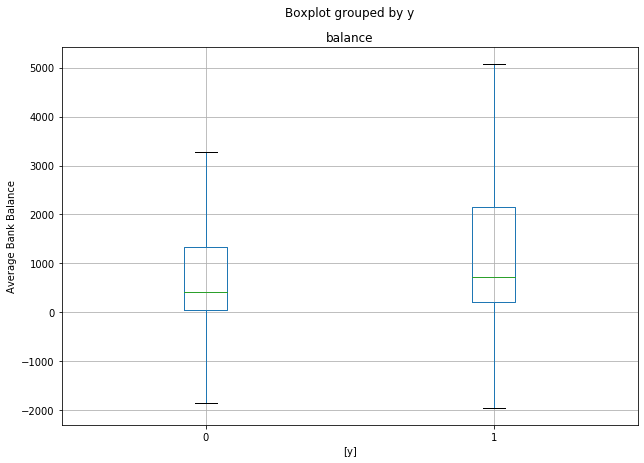

In [5]:
ax = df[['y', 'balance']].boxplot(by='y', showfliers=False, figsize=(10, 7))
ax.set_ylabel('Average Bank Balance')
plt.show()

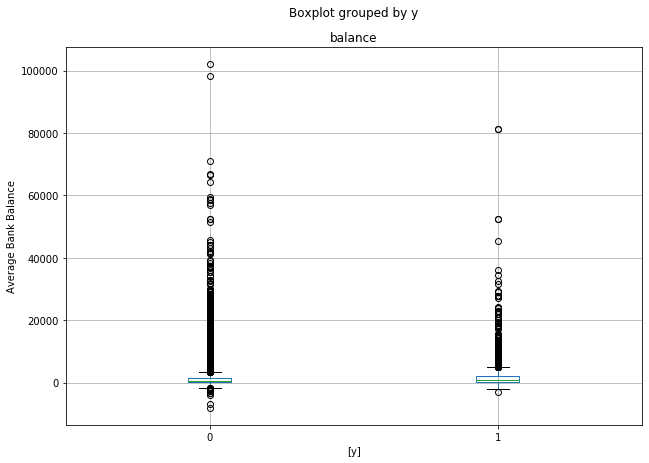

In [6]:
ax = df[['y', 'balance']].boxplot(by='y', showfliers=True, figsize=(10, 7))
ax.set_ylabel('Average Bank Balance')
plt.show()

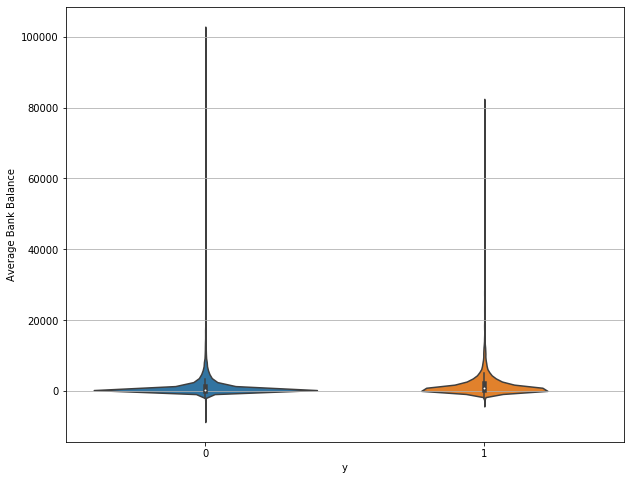

In [7]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 8)
sns.violinplot('y', 'balance', data=df, ax=axes)
axes.yaxis.grid(True)
axes.set_ylabel('Average Bank Balance')
plt.show()

In [8]:
success_by_contacts = df.groupby('campaign')['y'].sum() / df.groupby('campaign')['y'].count() * 100.0
success_by_contacts.head(15)

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
Name: y, dtype: float64

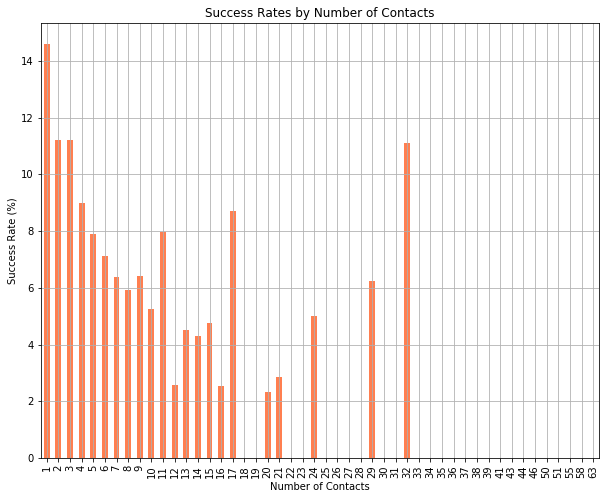

In [9]:
ax = success_by_contacts.plot(kind='bar', figsize=(10, 8), 
                                  title='Success Rates by Number of Contacts', grid=True, color='coral')
ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Success Rate (%)')
plt.show()

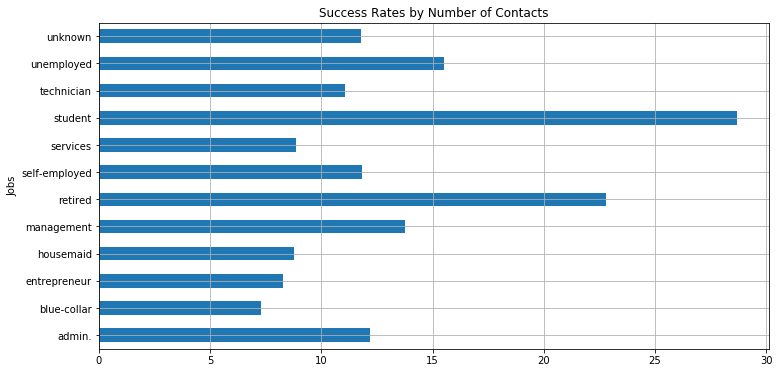

In [10]:
success_by_job = df.groupby('job')['y'].sum() / df.groupby('job')['y'].count() * 100

ax = success_by_job.plot(kind='barh', figsize=(12, 6), title="Success Rates by Number of Contacts", grid=True)
ax.set_ylabel('Jobs')
plt.show()

In [11]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(lambda x: months.index(x) + 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [12]:
df = pd.get_dummies(data=df, columns=['job', 'marital', 'education', 'contact', 'default', 'poutcome'])
df.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,yes,no,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,44,29,yes,no,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
2,33,2,yes,yes,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,47,1506,yes,no,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
4,33,1,no,no,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1


In [13]:
df['housing'] = df['housing'].apply(lambda x: 0 if x == "no" else 1)
df['loan'] = df['loan'].apply(lambda x: 0 if x == "no" else 1)
df.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,44,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
2,33,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,47,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split

x = df.drop(labels=['y'], axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, criterion='gini')
tree_model.fit(x_train, y_train)
res = tree_model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=res)
cm

array([[7795,  200],
       [ 694,  354]], dtype=int64)

In [17]:
idx = np.random.randint(df.shape[0], size=12)
random_data = df.iloc[idx, :].drop(labels=['y'], axis=1)
labels = df.iloc[idx, [10]]

res = tree_model.predict(random_data)
res_df = pd.DataFrame(data=labels.values, columns=['Real'])
res_df['Preds'] = res

res_df

,Real,Preds
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(x_train, y_train)
res = random_forest.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=res)
cm

array([[7791,  204],
       [ 710,  338]], dtype=int64)